# THỰC HÀNH 2: ẢNH KỸ THUẬT SỐ & MÀU
### 1. VIẾT CHƯƠNG TRÌNH XỬ LÝ ĐIỂM ẢNH
#### 1.1. Biến đổi cường độ ảnh (Image inverse transformation)


[[136 136 137 ... 122 122 123]
 [136 135 136 ... 116 125 126]
 [134 133 137 ... 122 128 123]
 ...
 [168 170 169 ... 177 174 174]
 [167 159 158 ... 171 172 177]
 [166 165 162 ... 176 174 174]]


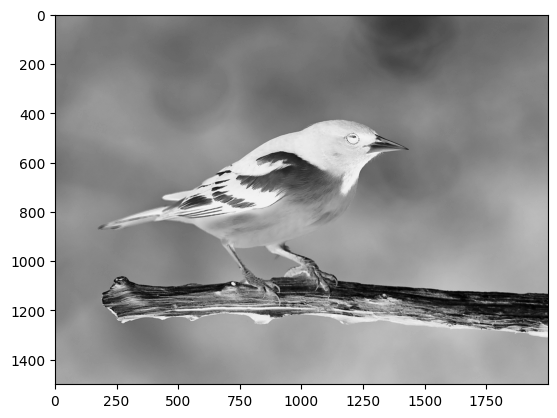

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh và chuyển sang ảnh xám
img = Image.open('bird.png').convert('L')
#Chuyển ảnh thành mảng
im_1 = np.asarray(img)
#Thực hiện phép biến đổi 
im_2 = 255 - im_1
# Chuyển mảng numpy thành ảnh
print(im_2)
new_img =Image.fromarray(im_2)
img.show()
plt.imshow(new_img, cmap='gray')
plt.show()

#### 1.2. Thay đổi chất lượng ảnh với Power law (Gamma-Correction)


[[ 5  5  5 ... 10 10  9]
 [ 5  6  5 ... 12  9  8]
 [ 6  6  5 ... 10  8  9]
 ...
 [ 1  1  1 ...  0  0  0]
 [ 1  2  2 ...  1  0  0]
 [ 1  1  1 ...  0  0  0]]


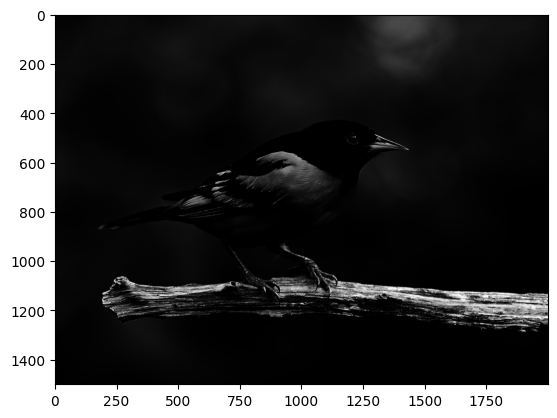

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh và chuyển sang ảnh xám
img =Image.open('bird.png').convert('L')
#đảo ánh dạng 'L' sang 1 mảng số (matrix)
im_1 = np.asarray(img)

#gama =5 (theo yêu cầu đề bài)
gamma = 5
# chuyển matrix từ số nguyên sang số thực 
b1 = im_1.astype(float)
#tìm giá trị lớn nhất trong b1
b2=np.max(b1)
#chuẩn hóa b1 (tức là chuyển các giá trị b1 vê thuộc khoảng [0,1])
b3 = (b1+1)/b2
#tính tương qun hàm mũ gama
b2 = np.log(b3)*gamma
#tính tương quan gama và quy về khoảng [0,1]
c= np.exp (b2) * 255.0
#chuyển c về số nguyên
c1 = c.astype(int)
print(c1)
d = Image.fromarray(c1)
img.show ()
d.show ()
plt.imshow(d, cmap='gray')
plt.show()


#### 1.3. Thay đổi cường độ điểm ảnh với Log Transformation

[[ 5  5  5 ... 10 10  9]
 [ 5  6  5 ... 12  9  8]
 [ 6  6  5 ... 10  8  9]
 ...
 [ 1  1  1 ...  0  0  0]
 [ 1  2  2 ...  1  0  0]
 [ 1  1  1 ...  0  0  0]]


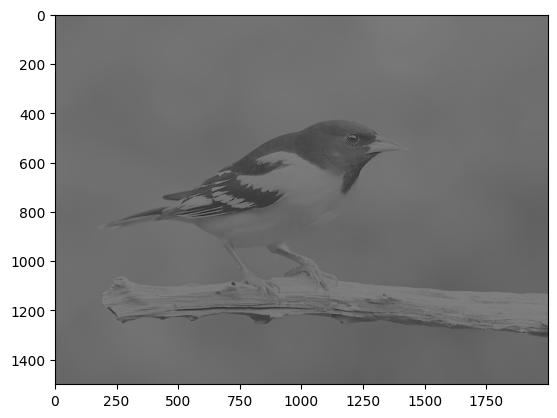

In [28]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
#Mở ảnh và chuyển sang ảnh xám
img = Image.open('bird.png').convert('L')
#đảo ánh dạng 'L' sang 1 mảng số (matrix)
im_1 = np.asarray(img)
#chuyển matrix từ số nguyên sang số thực 
b1 = im_1.astype (float)
#tìm giá trị lớn nhất trong b1
b2 = np.max (b1)
#biến đổi log
c = (128.0 * np.log(1 + b1))/np.log (1 + b2)

#chuyển c về số nguyên
cl = c.astype (int)
print(c1)
d = Image.fromarray (cl)
img.show ()
d.show ()
plt.imshow (d, cmap='gray')
plt.show ()


#### 1.4. Histogram equalization


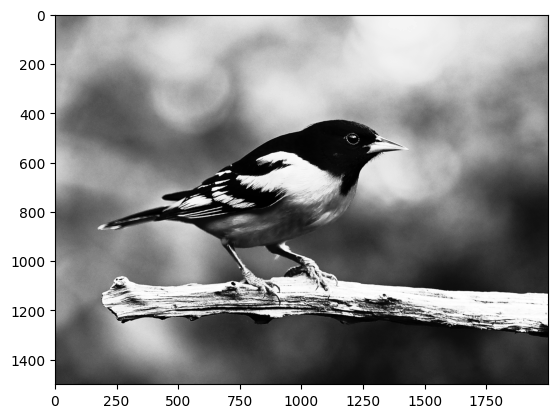

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#mở ảnh trắng đen
img = Image.open('bird.png').convert('L')
# chuyển ảnh thành mảng ndarray
im1 = np.asarray(img)
# chuyển mảng 2D thành 1D
bl = im1.flatten()
# tính histogram và bins
hist, bins = np.histogram(im1, 256, [0, 255])
# tính hàm phân phối tích lũy (CDF)
cdf = hist.cumsum()
# loại bỏ các giá trị bằng 0 trong cdf
cdf_m = np.ma.masked_equal (cdf, 0)
# thực hiện cân bằng lược đồ
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max () - cdf_m.min ())
cdf_m = num_cdf_m/den_cdf_m
# gán giá trị 0 cho các vị trí bị che trong cdf
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
# gán các giá trị mới vào mảng 1D
im2 = cdf [bl]
# chuyển mảng 1D về 2D
im3 = np.reshape (im2, im1.shape)
# tạo ảnh mới từ mảng đã xử lý
im4 = Image.fromarray (im3)
img.show ()
im4.show ()
plt.imshow (im4, cmap='gray')
plt.show ()


#### 1.5. Thay đổi ảnh với Contrast Stretching


0 255
<PIL.Image.Image image mode=F size=2000x1500 at 0x14E80E84D90>


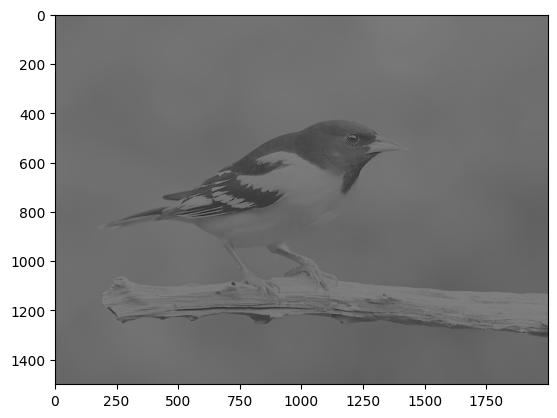

In [20]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
# Mở ảnh và chuyển sang ảnh trắng đen
img = Image.open('bird.png').convert ('L')
# Chuyển ảnh thành mảng numpy 2D
iml = np.asarray(img)
# Tìm giá trị pixel lớn nhất và nhỏ nhất
b = iml.max ()
a = iml.min()
print (a, b)
# Chuyển mảng sang kiểu float để tính toán
C = iml.astype (float)
# Biến đổi giãn độ tương phản
im2 = 255* (c- a)/(b - a)

# Tạo ảnh từ mảng đã xử lý
im3 = Image.fromarray (im2)
print(im3)
img.show ()
im3.show ()
plt.imshow(im3, cmap='gray')
plt.show ()


#### 1.6. 
##### 1.6.1. Biến đổi ảnh với Fast Fourier



<PIL.Image.Image image mode=F size=2000x1500 at 0x14EF9DB86D0>


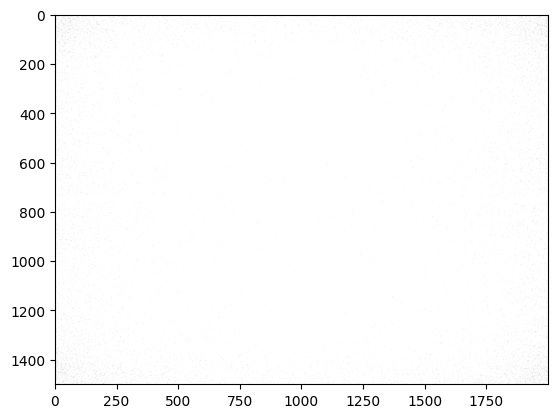

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
# Mở ảnh và chuyển sang ảnh xám
img = Image.open('bird.png').convert('L')
#Chuyển ảnh thành mảng numpy
iml = np.asarray (img)
# Thực hiện biến đổi fft
c= abs(scipy.fftpack.fft2 (iml))
# Dịch tâm tần số về giữa (center shift)
d= scipy.fftpack.fftshift (c)
d = d.astype (float)
#Tạo ảnh từ mảng đã xử lý
im3 = Image.fromarray (d)
print(im3)
img.show ()
im3.show()
plt.imshow (im3, cmap = 'gray')
plt.show ()


##### 1.6.2. Lọc ảnh trong miền tần suất
- Butterworth Lowpass Filter



<PIL.Image.Image image mode=F size=2000x1500 at 0x14E81EA3310>


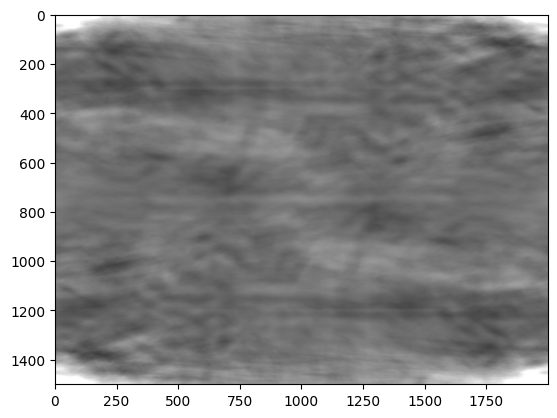

In [33]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# mở ảnh xám
img = Image.open('bird.png').convert('L')
# chuyển ảnh thành mảng numpy
iml = np.asarray(img)
# thực hiện biến đổi Fourier nhanh (FFT)
c = abs(scipy.fftpack.fft2(iml))
# dịch phổ Fourier về trung tâm
d = scipy.fftpack.fftshift(c)
# khởi tạo các biến cho hàm tích chập
M = d.shape[0]
N = d.shape[1]
# khởi tạo H và gán giá trị là 1
H = np.ones((M, N))
centerl = M / 2
center2 = N / 2
d_0 = 30.0 # bán kính cắt
t1 = 1 # bậc của bộ lọc Butterworth (BLPF)
t2 = 2 * t1
# định nghĩa hàm tích chập cho BLPF
for i in range(1, M):
    for j in range(1, N):
        rl = (i - centerl) ** 2 + (j - center2) ** 2
        # tính khoảng cách Euclid từ gốc tọa độ
        r = math.sqrt(rl)
        # sử dụng bán kính cắt để loại bỏ tần số cao
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0) ** t1)
# chuyển H từ ndarray sang ảnh
H = H.astype(float)
H = Image.fromarray(H)
# thực hiện tích chập
con = d * H
# tính biên độ của ảnh sau biến đổi Fourier ngược
e = abs(scipy.fftpack.ifft2(con))
# chuyển e từ ndarray sang ảnh
e = e.astype(float)
im3 = Image.fromarray(e)
print(im3)
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()


- Butterworth highpass Filter

<PIL.Image.Image image mode=F size=2000x1500 at 0x2BF2A668950>


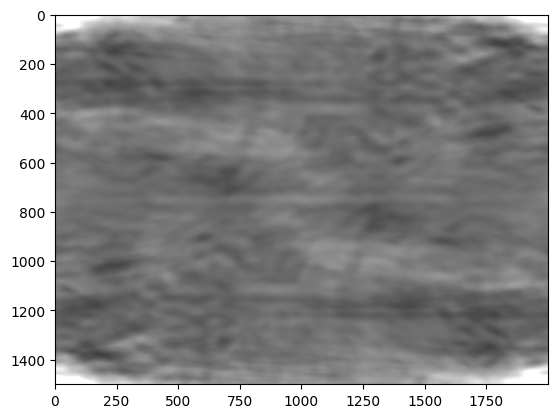

In [1]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# mở ảnh xám
img = Image.open('bird.png').convert('L')
# chuyển ảnh thành mảng numpy
iml = np.asarray(img)
# thực hiện biến đổi Fourier nhanh (FFT)
c = abs(scipy.fftpack.fft2(iml))
# dịch phổ Fourier về trung tâm
d = scipy.fftpack.fftshift(c)
# khởi tạo các biến cho hàm tích chập
M = d.shape[0]
N = d.shape[1]
# H được định nghĩa và khởi tạo tất cả giá trị là 1
H = np.ones((M, N))
centerl = M / 2
center2 = N / 2
d_0 = 30.0  # bán kính cắt
t1 = 1      # bậc của bộ lọc Butterworth Lowpass Filter (BLPF)
t2 = 2 * t1
# định nghĩa hàm tích chập cho BLPF
for i in range(1, M):
    for j in range(1, N):
        rl = (i - centerl) ** 2 + (j - center2) ** 2
        # tính khoảng cách Euclid từ gốc tọa độ
        r = math.sqrt(rl)
        # sử dụng bán kính cắt để loại bỏ tần số cao
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0) ** t2)
# chuyển H từ ndarray sang ảnh
H = H.astype(float)
H = Image.fromarray(H)
# thực hiện phép tích chập
con = d * H
# tính biên độ của ảnh sau biến đổi Fourier ngược
e = abs(scipy.fftpack.ifft2(con))
# chuyển e từ ndarray sang ảnh
e = e.astype(float)
im3 = Image.fromarray(e)
print(im3)
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()


#### 1. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:
- Image inverse transformation
- Gamma-Correction
- Log Transformation
- Histogram equalization
- Contrast Stretching
Khi người dùng ấn phím I, G, L, H, C thì chương trình sẽ thực hiện hàm tương ứng cho các
hình trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.

=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===
	I. Image inverse transformation
	G. Gamma Correction
	L. Log Transformation
	H. Histogram Equalization
	C. Contrast Stretching
	0. Thoát


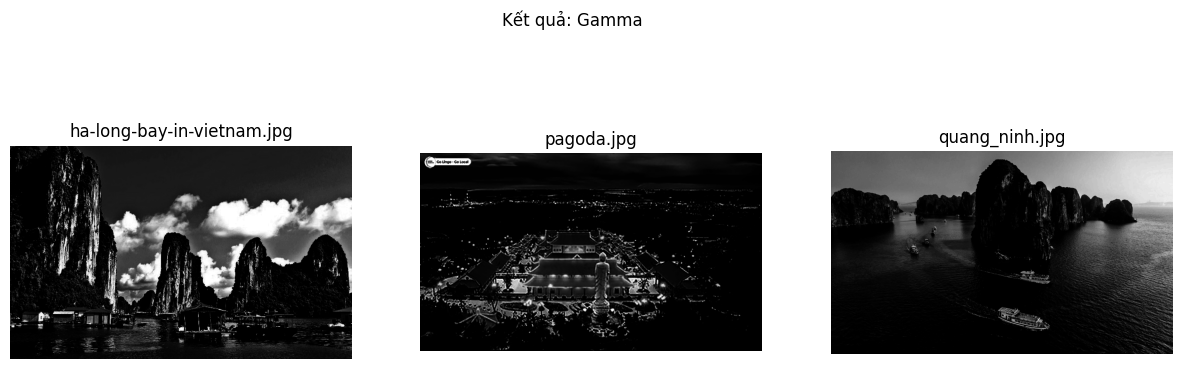

In [ ]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

def Image_inverse_transformation(im_1):
    return 255 - im_1

def Gamma_Correction(im_1, gamma=0.5):
    # Chuẩn hóa ảnh về [0,1]
    normalized = im_1 / 255.0
    corrected = np.power(normalized, gamma)
    return np.clip(corrected * 255, 0, 255).astype(np.uint8)


def Log_Transformation(im_1):
    # Đổi kiểu dữ liệu để tính toán chính xác hơn
    b1 = im_1.astype(float)
    b2 = np.max(b1)
    # Công thức log transform chuẩn hóa về 128
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)
    return np.clip(c, 0, 255).astype(np.uint8)

def Histogram_equalization(im_1):
    flat = im_1.flatten()
    hist, _ = np.histogram(flat, 256, [0, 255])
    # Tính hàm phân phối tích lũy (CDF)
    cdf = hist.cumsum()
    # Bỏ qua giá trị bằng 0 để tránh chia cho 0
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    # Lấp lại phần bị che (mask) bằng 0
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized = cdf[flat]
    return np.reshape(equalized, im_1.shape)

def Contrast_Stretching(im_1):
    a = im_1.min()
    b = im_1.max()
    # Công thức giãn tương phản chuẩn hóa về [0,255]
    stretched = 255 * (im_1 - a) / (b - a)
    return np.clip(stretched, 0, 255).astype(np.uint8)

def apply_transformation(transformation_func, method_name):
    input_folder = "exercise"
    output_folder = "output"
    os.makedirs(output_folder, exist_ok=True)
 # Lọc ra 3 file ảnh đầu tiên có đuôi png/jpg/jpeg trong thư mục "exercise"
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith((".png", ".jpg", ".jpeg"))][:3]
    processed_images = []
    for file_name in image_files:
        img_path = os.path.join(input_folder, file_name)
        img = Image.open(img_path).convert("L")
        im_np = np.asarray(img)
        # Áp dụng biến đổi
        processed_np = transformation_func(im_np)
        processed_img = Image.fromarray(processed_np)

        output_path = os.path.join(output_folder, f"{os.path.splitext(file_name)[0]}_{method_name}.png")
        processed_img.save(output_path)

        processed_images.append((processed_img, file_name))

    # Hiển thị ảnh
    fig, axes = plt.subplots(1, len(processed_images), figsize=(15, 5))
     # Trường hợp chỉ có 1 ảnh, ép axes thành list để duyệt được
    if len(processed_images) == 1:
        axes = [axes]
    for ax, (image, fname) in zip(axes, processed_images):
        ax.imshow(image, cmap='gray')
        ax.set_title(fname)
        ax.axis('off')
    plt.suptitle(f"Kết quả: {method_name}")
    plt.show()

def menu():
    print("=== ỨNG DỤNG BIẾN ĐỔI ẢNH ===")
    print("\tI. Image inverse transformation")
    print("\tG. Gamma Correction")
    print("\tL. Log Transformation")
    print("\tH. Histogram Equalization")
    print("\tC. Contrast Stretching")
    print("\t0. Thoát")

    luachon = input("Nhập lựa chọn của bạn: ").upper()
    match luachon:
        case 'I':
            apply_transformation(Image_inverse_transformation, "Inverse")
        case 'G':
            apply_transformation(Gamma_Correction, "Gamma")
        case 'L':
            apply_transformation(Log_Transformation, "Log")
        case 'H':
            apply_transformation(Histogram_equalization, "Histogram_Eq")
        case 'C':
            apply_transformation(Contrast_Stretching, "Contrast")
        case '0':
            print("Tạm biệt!")
        case _:
            print("Lựa chọn không hợp lệ!")

menu()
